In [14]:
pip install --upgrade google-api-python-client

Note: you may need to restart the kernel to use updated packages.


In [15]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [16]:
api_key='##############################'
channel_ids=['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
             'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
             'UCiT9RITQ9PW6BhXK0y2jaeg', #Ken Jee
             'UC7cs8q-gJRlGwj4A8OmCmXg', #Alex the Analyst
             'UC2UXDak6o7rBm23k3Vv5dww', #Tina Huang
            ]

youtube=build('youtube','v3',developerKey=api_key)

# Function to get channel statistics

In [17]:
def get_channel_stats(youtube, channel_ids):
    all_data=[]
    request=youtube.channels().list(
    part='snippet,contentDetails,Statistics',id=','.join(channel_ids))
    
    response=request.execute()
    
    for i in range(len(response['items'])):
        data=dict(Channel_name=response['items'][i]['snippet']['title'],
                  Subscribers=response['items'][i]['statistics']['subscriberCount'],
                  Views=response['items'][i]['statistics']['viewCount'],
                  Total_videos=response['items'][i]['statistics']['videoCount'],
                  playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                  )
        all_data.append(data)
    
    return all_data
    
    

In [18]:
channel_statistics=get_channel_stats(youtube,channel_ids)

In [19]:
channel_data=pd.DataFrame(channel_statistics)

In [20]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Ken Jee,256000,8819406,286,UUiT9RITQ9PW6BhXK0y2jaeg
1,Alex The Analyst,690000,29595453,281,UU7cs8q-gJRlGwj4A8OmCmXg
2,Tina Huang,606000,28144903,186,UU2UXDak6o7rBm23k3Vv5dww
3,Luke Barousse,411000,20365554,153,UULLw7jmFsvfIVaUFsLs8mlQ
4,techTFQ,266000,14208604,102,UUnz-ZXXER4jOvuED5trXfEA


In [21]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])

channel_data.dtypes


Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

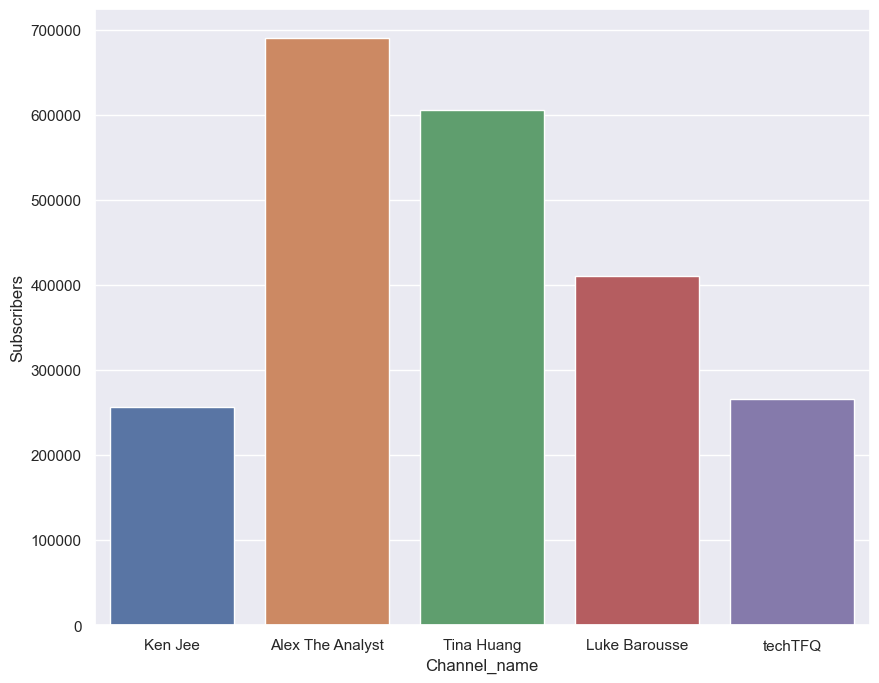

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

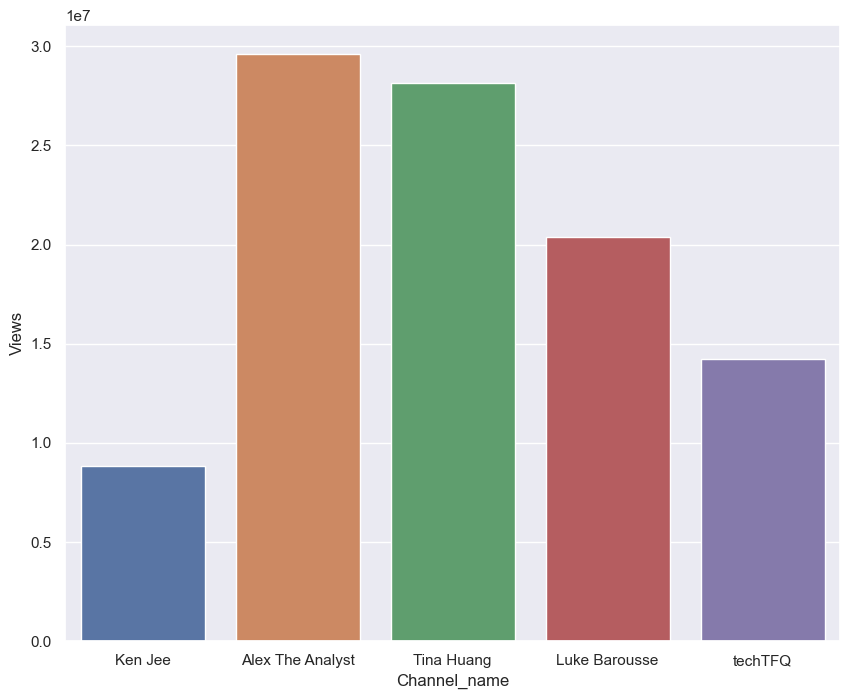

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='Channel_name',y='Views',data=channel_data)

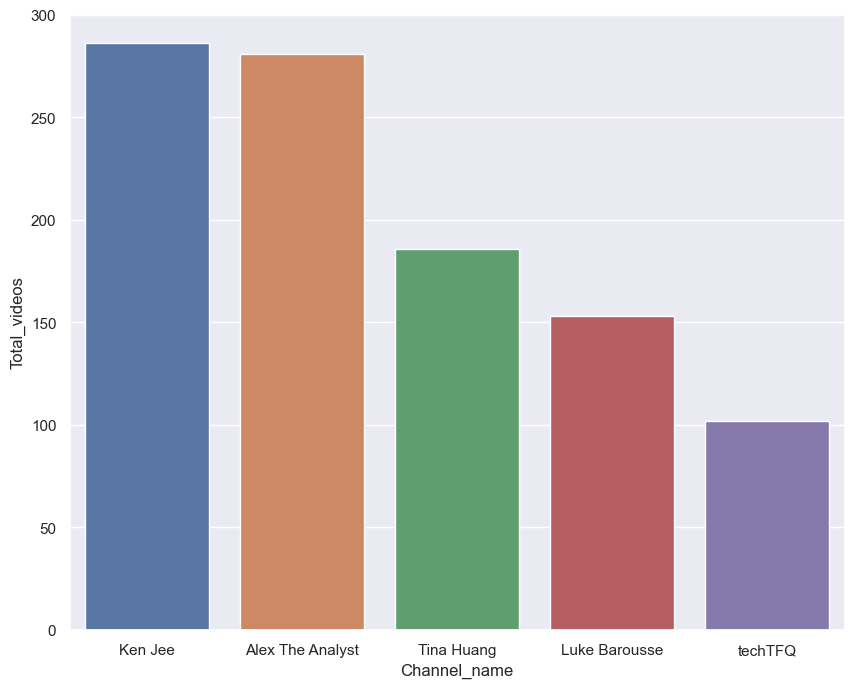

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

# Function to get video ids

In [72]:
playlist_id=channel_data.loc[channel_data['Channel_name']=='Ken Jee','playlist_id'].iloc[0]

In [78]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:      
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids


In [79]:
 video_ids=get_video_ids(youtube, playlist_id)

In [80]:
video_ids

['Hyhfa7z0jTk',
 'L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CM

# Function to get video details

In [95]:
def get_video_details(youtube,video_ids):
    all_video_stats=[]
    for i in range(0,len(video_ids),50):
        request=youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response=request.execute()
        
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                            Published_date=video['snippet']['publishedAt'],
                            Views=video['statistics']['viewCount'],
                            Likes=video['statistics']['likeCount'],
                            #Dislikes=video['statistics']['dislikeCount'],
                            Comments=video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [97]:
video_details=get_video_details(youtube,video_ids)

In [98]:
video_data=pd.DataFrame(video_details)

In [99]:
video_data

,Title,Published_date,Views,Likes,Comments
0,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30T12:00:22Z,1679,55,18
1,A Data Dream Come True,2023-11-17T12:00:28Z,1944,86,23
2,The Death of the Full-Time Job (Rise of the Co...,2023-09-22T11:46:35Z,5761,383,75
3,How to Survive a Down Data Job Market,2023-09-05T10:50:39Z,16661,550,63
4,The Harsh Reality of the Data Job Market,2023-08-24T11:30:19Z,106289,2588,292
...,...,...,...,...,...
281,How to Simulate NBA Games in Python,2018-11-19T23:31:49Z,18188,398,49
282,Should You Get A Masters in Data Science?,2018-11-14T01:39:33Z,20658,301,135
283,How I Became A Data Scientist From a Business ...,2018-11-12T00:26:08Z,6509,199,23
284,Predicting Season Long NBA Wins Using Multiple...,2018-07-10T16:39:52Z,8948,195,17


In [100]:
video_data['Published_date']=pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,1679,55,18
1,A Data Dream Come True,2023-11-17,1944,86,23
2,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,5761,383,75
3,How to Survive a Down Data Job Market,2023-09-05,16661,550,63
4,The Harsh Reality of the Data Job Market,2023-08-24,106289,2588,292
...,...,...,...,...,...
281,How to Simulate NBA Games in Python,2018-11-19,18188,398,49
282,Should You Get A Masters in Data Science?,2018-11-14,20658,301,135
283,How I Became A Data Scientist From a Business ...,2018-11-12,6509,199,23
284,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8948,195,17


In [101]:
top10_videos=video_data.sort_values(by='Views',ascending=False).head(10)

In [102]:
top10_videos

,Title,Published_date,Views,Likes,Comments
188,How I Would Learn Data Science (If I Had to St...,2020-05-08,1397518,48955,1989
209,The Best Free Data Science Courses Nobody is T...,2020-03-09,348296,21212,620
164,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,348195,7600,433
68,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,343588,15027,537
215,3 Proven Data Science Projects for Beginners (...,2020-02-17,331471,17906,526
201,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,203304,5131,173
254,The Projects You Should Do To Get A Data Scien...,2019-07-30,152562,5731,255
101,Why You Probably Won't Become a Data Scientist,2021-04-09,138689,4038,479
185,How to Make A Data Science Portfolio Website w...,2020-05-15,135063,4513,193
214,How to Set Up Your Data Science Environment (A...,2020-02-21,133724,2529,97


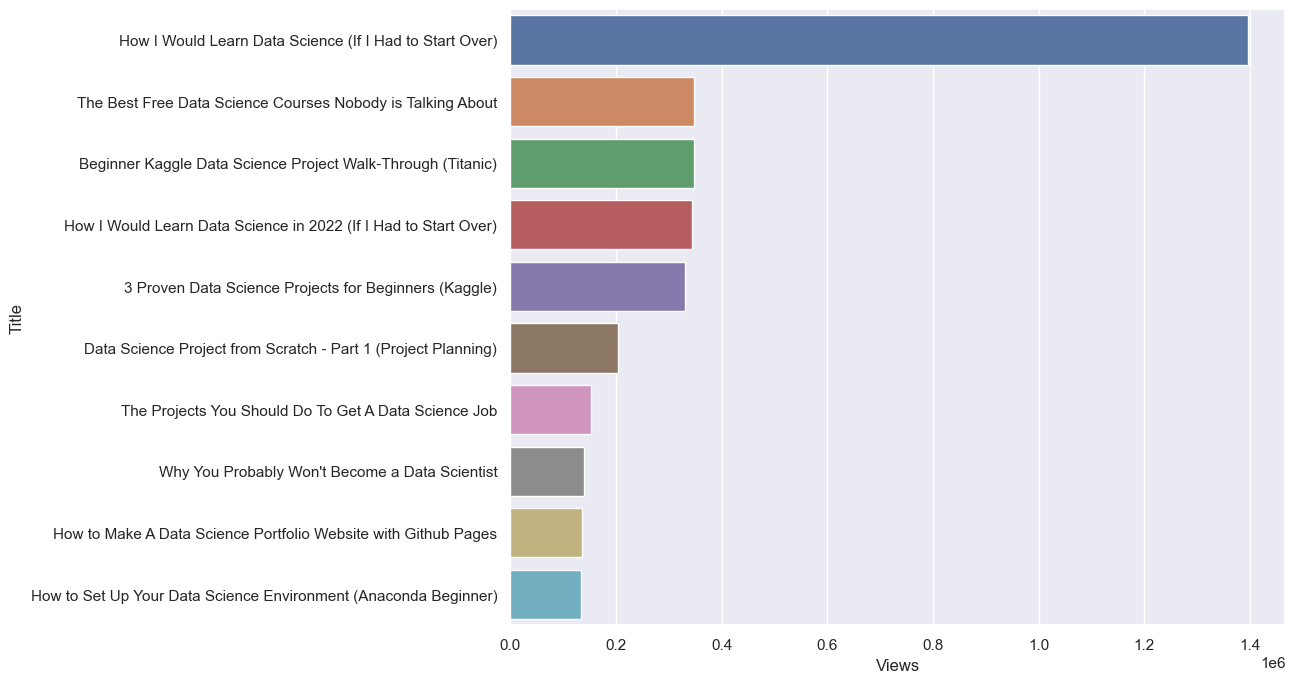

In [103]:
ax1=sns.barplot(x='Views',y='Title',data=top10_videos)

In [104]:
video_data['Month']=pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [105]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,1679,55,18,Nov
1,A Data Dream Come True,2023-11-17,1944,86,23,Nov
2,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,5761,383,75,Sep
3,How to Survive a Down Data Job Market,2023-09-05,16661,550,63,Sep
4,The Harsh Reality of the Data Job Market,2023-08-24,106289,2588,292,Aug
...,...,...,...,...,...,...
281,How to Simulate NBA Games in Python,2018-11-19,18188,398,49,Nov
282,Should You Get A Masters in Data Science?,2018-11-14,20658,301,135,Nov
283,How I Became A Data Scientist From a Business ...,2018-11-12,6509,199,23,Nov
284,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8948,195,17,Jul


In [108]:
videos_per_month=video_data.groupby('Month',as_index=False).size()

In [109]:
videos_per_month

,Month,size
0,Apr,22
1,Aug,27
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,27
6,Jun,20
7,Mar,32
8,May,24
9,Nov,22


In [110]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [111]:
videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order,ordered=True)

In [113]:
videos_per_month=videos_per_month.sort_index()

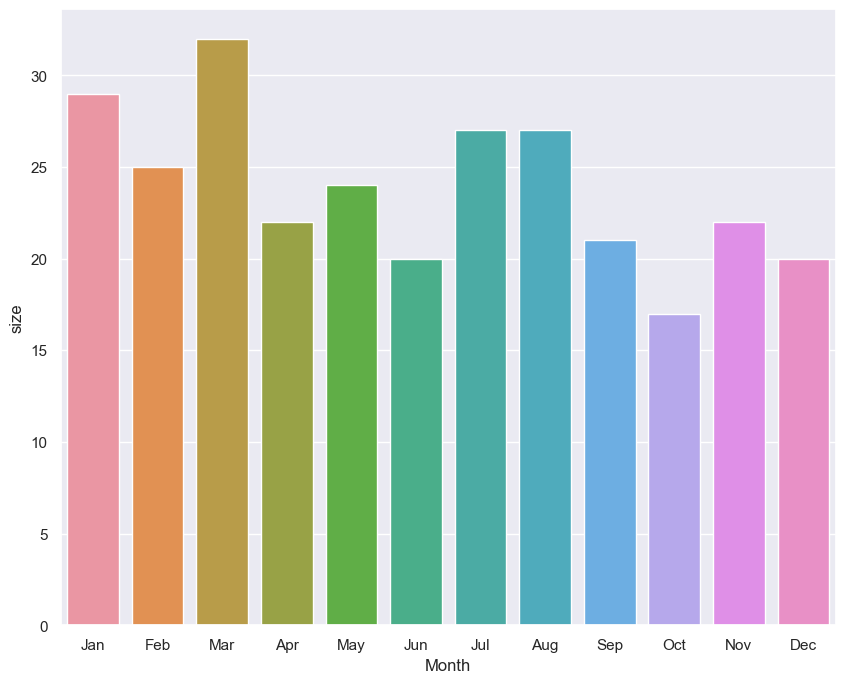

In [114]:
ax2=sns.barplot(x='Month',y='size',data=videos_per_month)

In [115]:
video_data.to_csv('Video_Details(Ken Jee).csv')